## Ultimate Challenge

### Part 1

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [219]:
#Read the json data file
logins_df = pd.read_json('logins.json')

In [220]:
#Explore the dataframe and see what it consists of
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [221]:
#summary of the dataframe shows no null values
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [222]:
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [223]:
# login times were not in order
logins_df.sort_values(by='login_time',inplace=True)

In [224]:
logins_df.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [225]:
type(logins_df['login_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [226]:
logins_df.set_index('login_time', inplace=True)
logins_df['login_counts'] = 1
logins_df = logins_df.resample('15T').sum()

In [227]:
logins_df

,login_counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


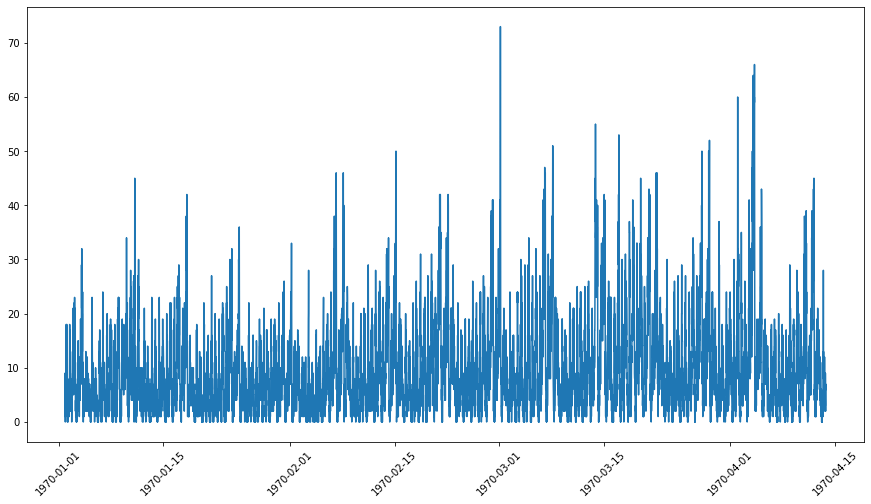

In [228]:
plt.figure(figsize=(15,8))
plt.plot(logins_df)
plt.xticks(rotation=45)
plt.show()

##### There appears to a be a regularity to the peaks and valleys. They follow a weekly basis as there are 4 peaks each month. From the above graph we can see that march and april had higher logins and there seems to be a slight upward trend.  We can see a sinusoidal pattern that seems to have an average value that is increasing

In [229]:
logins_df.describe()

,login_counts
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [230]:
#create new columns for items of interest
logins_df = logins_df.assign(day_of_month=logins_df.index.day)
logins_df = logins_df.assign(day_of_week=logins_df.index.weekday)
logins_df

,login_counts,day_of_month,day_of_week
login_time,,,
1970-01-01 20:00:00,2,1,3
1970-01-01 20:15:00,6,1,3
1970-01-01 20:30:00,9,1,3
1970-01-01 20:45:00,7,1,3
1970-01-01 21:00:00,1,1,3
...,...,...,...
1970-04-13 17:45:00,5,13,0
1970-04-13 18:00:00,5,13,0
1970-04-13 18:15:00,2,13,0


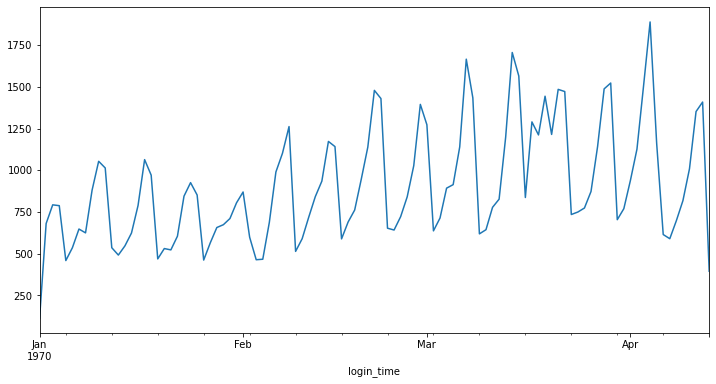

In [231]:
#resample to daily frequency
df_day = logins_df['login_counts'].resample('1D').sum()
df_day.plot(kind='line',figsize=(12,6))

Resampling to daily frequency shows there is an increasing trend of the average number of logins. At first, through the month of January, there seems to be little or no change in the average number of daily logins, then February starts the increasing trend.

In [232]:
# Split by month into new dataframes
jan_df = logins_df['1970-01-01': '1970-01-31']
jan_df.reset_index(drop=False, inplace=True)

feb_df = logins_df['1970-02-01': '1970-02-28']
feb_df.reset_index(drop=False, inplace=True)

mar_df = logins_df['1970-03-01': '1970-03-31']
mar_df.reset_index(drop=False, inplace=True)

apr_df = logins_df['1970-04-01': '1970-04-30']
apr_df.reset_index(drop=False, inplace=True)


In [233]:
jan_df.head()

,login_time,login_counts,day_of_month,day_of_week
0,1970-01-01 20:00:00,2,1,3
1,1970-01-01 20:15:00,6,1,3
2,1970-01-01 20:30:00,9,1,3
3,1970-01-01 20:45:00,7,1,3
4,1970-01-01 21:00:00,1,1,3


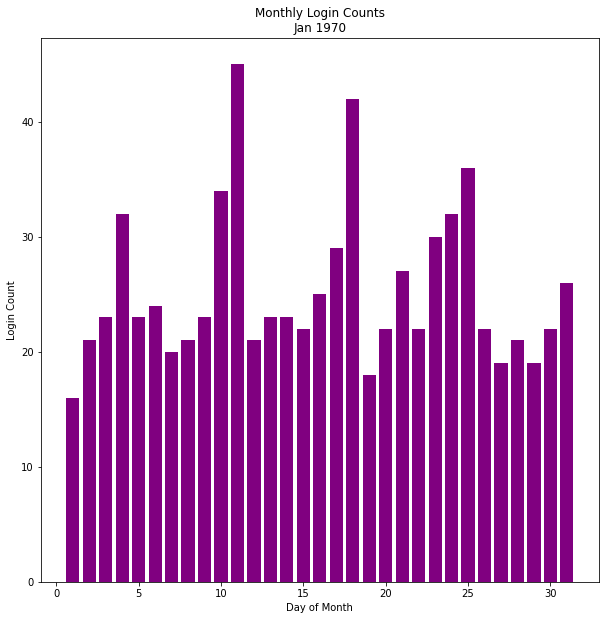

In [234]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(jan_df['day_of_month'],
        jan_df['login_counts'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Day of Month",
       ylabel="Login Count",
       title="Monthly Login Counts\nJan 1970")

plt.show()

In [235]:
feb_df.head()

,login_time,login_counts,day_of_month,day_of_week
0,1970-02-01 00:00:00,12,1,6
1,1970-02-01 00:15:00,11,1,6
2,1970-02-01 00:30:00,17,1,6
3,1970-02-01 00:45:00,15,1,6
4,1970-02-01 01:00:00,16,1,6


The jan dataframe starts from day 3 of the week i.e; Thursday. Considering that we see that there is an upward trend towards the end of week (Fri, Sat, Sun) and lower logins for rest of the week.

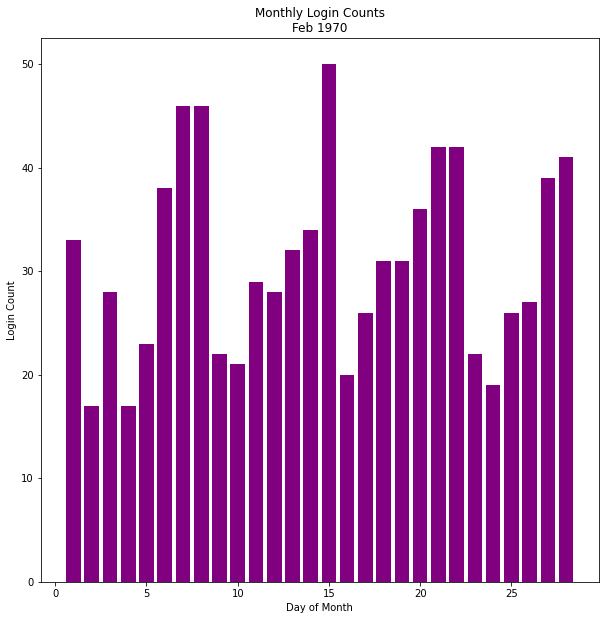

In [236]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(feb_df['day_of_month'],
        feb_df['login_counts'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Day of Month",
       ylabel="Login Count",
       title="Monthly Login Counts\nFeb 1970")

plt.show()

Feb dataframe starts on a sunday. Consistent with the Jan weekends have upwward trend. Although the first week of feb was distinct with an unusual high tuesday logins.

In [237]:
mar_df.head()

,login_time,login_counts,day_of_month,day_of_week
0,1970-03-01 00:00:00,16,1,6
1,1970-03-01 00:15:00,19,1,6
2,1970-03-01 00:30:00,17,1,6
3,1970-03-01 00:45:00,12,1,6
4,1970-03-01 01:00:00,20,1,6


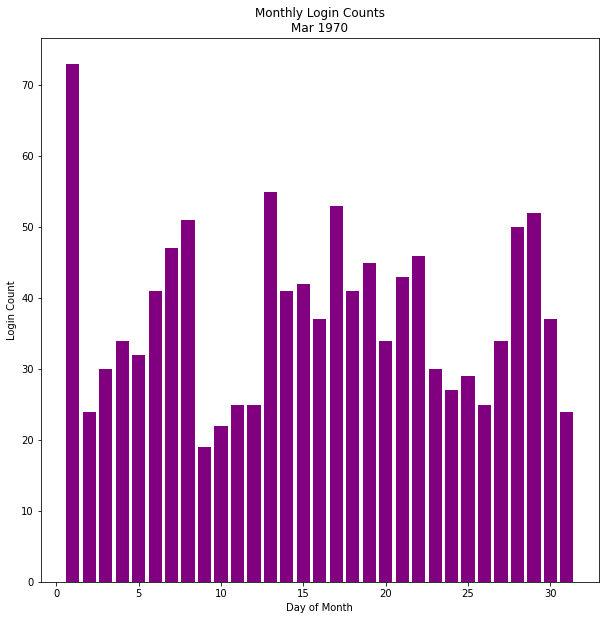

In [238]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(mar_df['day_of_month'],
       mar_df['login_counts'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Day of Month",
       ylabel="Login Count",
       title="Monthly Login Counts\nMar 1970")

plt.show()

March startes on a Sunday which has very high logins compared to the rest of the month. March month is not that consistent with Jan and Feb as we see some variability in the middle of the month with low weekend logins and high weekday logins

In [239]:
apr_df.head()

,login_time,login_counts,day_of_month,day_of_week
0,1970-04-01 00:00:00,15,1,2
1,1970-04-01 00:15:00,11,1,2
2,1970-04-01 00:30:00,14,1,2
3,1970-04-01 00:45:00,19,1,2
4,1970-04-01 01:00:00,16,1,2


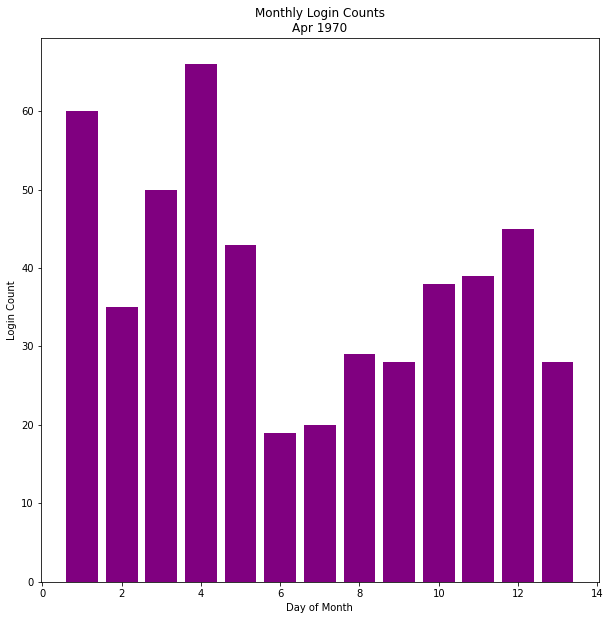

In [240]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(apr_df['day_of_month'],
        apr_df['login_counts'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Day of Month",
       ylabel="Login Count",
       title="Monthly Login Counts\nApr 1970")

plt.show()

Apr does not information for the full month. The first week of the april looks inconsistent with the regular trend. However we cannot draw any conclusions with partial data

### Part 2

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:\
a. how you will implement the experiment\
b. what statistical test(s) you will conduct to verify the significance of the
observation\
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


### Answer

I would choose the measure of success as if there is equal distribution of drivers in both cities Gotham and Metropolis at both day and night shifts. Another metric is also profitability since its a business model, however this would be based on user satisfaction, availability of drivers (day and night), reduced wait time etc. which would contribute to long term profits.

We can compare pre-toll vs. post-toll ridership using A/B testing. If drivers being exclusive to one city really affects business then it must be because of lack of supply, extending the waiting times for riders and driving the cost higher as well.

Hypothesis testing can be done on each of the metrics\
average wait time - the null hypothesis would be that the difference between the two means will be zero (or that they are equal)\

We can do timeframe of 30 days without reimbursment period, comapred to 30 days during with reimbursement period and carry on the program for 6 months (180 days) ensuring randomness. We can measure the p-value for each hypothesis. If we disprove the null hypothesis for all the metrics, then we have proven that the reimbursement program works. The next step then is to contrast the cost of the total reimbursements against the gains in revenue.

## Part 3

In [241]:
# Read in the data
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [243]:
# Since the date fields have been read in as 'object' data types, we should convert them to proper datetime format
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [244]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [245]:
# We see some null values inspecting the dataframe
for column in list(df.columns):
    num_missing = len(df[df[column].isnull()])
    if num_missing != 0:
        print('There are {} missing values in {}'.format(num_missing, column))

There are 8122 missing values in avg_rating_of_driver
There are 396 missing values in phone
There are 201 missing values in avg_rating_by_driver


Since these three columns have missing values, let's look at the distribution of values in those columns to decide on a filling method

C:\Users\asha2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\asha2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

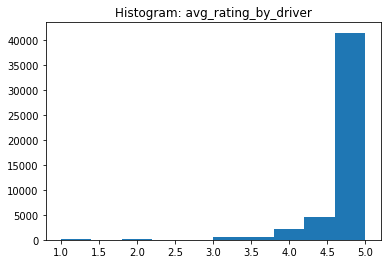

In [246]:
# Let's look at the distribution of values for avg_rating_by_driver
plt.hist(df['avg_rating_by_driver'])
plt.title('Histogram: avg_rating_by_driver')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

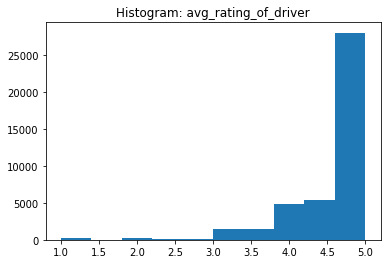

In [247]:
# Let's look at the distribution of values for avg_rating_of_driver

plt.hist(df['avg_rating_of_driver'])
plt.title('Histogram: avg_rating_of_driver')
plt.show

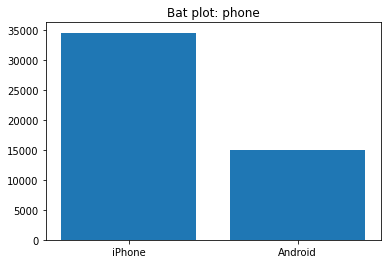

In [248]:
# Let's look at the distribution of values for phone

plt.bar([1,2], df['phone'].value_counts(), align='center')
plt.xticks([1,2], ['iPhone', 'Android'])
plt.title('Bat plot: phone')
plt.show;

The first two features are numerical in nature, so we visualize with a histogram. Seeing as they are highly skewed, we will fill in the missing values using the mean so that we can preserve it. The third feature is nominal and is weighted toward 'iPhone', and so we will fill in missing values with this value.

In [249]:
# Fill in missing values

df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


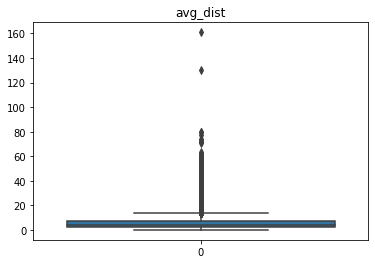

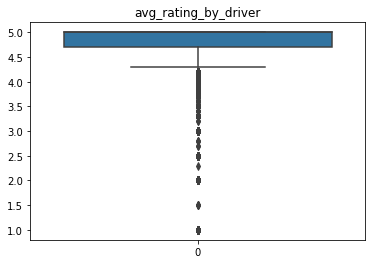

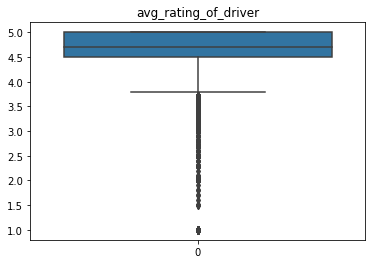

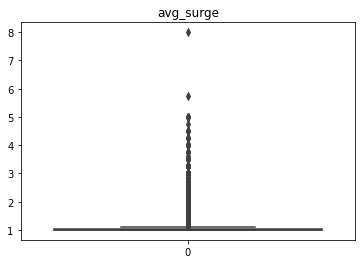

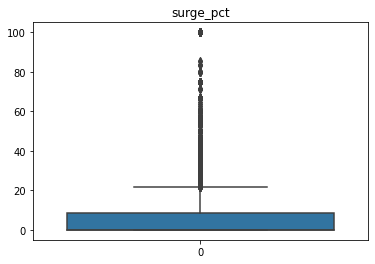

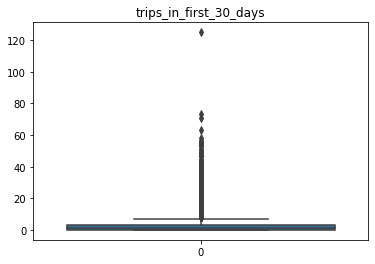

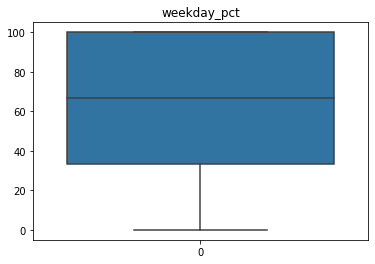

In [251]:
# Make list of each feature type for easy plotting
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

categorical_features = ['city', 'phone', 'ultimate_black_user']

# Show boxplots of numerical features
import seaborn as sns

for feature in numerical_features:
    sns.boxplot(data=df[feature])
    plt.title(feature)
    plt.show()

All columns has outliers except weekday_pct

In [252]:
# Filter out rows with features that have values more than 3 standard deviations from the mean
df = df[np.abs(df['avg_dist']-df['avg_dist'].mean())<=(3*df['avg_dist'].std())]
df = df[np.abs(df['avg_rating_by_driver']-df['avg_rating_by_driver'].mean())<=(3*df['avg_rating_by_driver'].std())]
df = df[np.abs(df['avg_rating_of_driver']-df['avg_rating_of_driver'].mean())<=(3*df['avg_rating_of_driver'].std())]
df = df[np.abs(df['avg_surge']-df['avg_surge'].mean())<=(3*df['avg_surge'].std())]
df = df[np.abs(df['surge_pct']-df['surge_pct'].mean())<=(3*df['surge_pct'].std())]
df = df[np.abs(df['trips_in_first_30_days']-df['trips_in_first_30_days'].mean())<=(3*df['trips_in_first_30_days'].std())]
df.reset_index(drop=True, inplace=True)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 12 columns):
city                      44666 non-null object
trips_in_first_30_days    44666 non-null int64
signup_date               44666 non-null datetime64[ns]
avg_rating_of_driver      44666 non-null float64
avg_surge                 44666 non-null float64
last_trip_date            44666 non-null datetime64[ns]
phone                     44666 non-null object
surge_pct                 44666 non-null float64
ultimate_black_user       44666 non-null bool
weekday_pct               44666 non-null float64
avg_dist                  44666 non-null float64
avg_rating_by_driver      44666 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.8+ MB


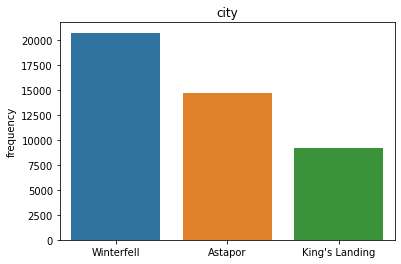

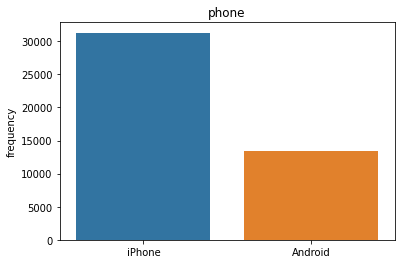

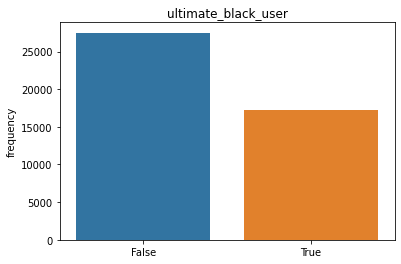

In [254]:
# Create box plots of all categorical, non-date data

for feature in categorical_features:
    sns.barplot(x = list(df[feature].value_counts().index), 
                y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('frequency')
    plt.show()

We see that all non-date categorical features take values we would expect and so we do not need to clean these any further

In [255]:
# Assuming max of last trip date as date this data was collected since it is the latest date available
data_date = max(df.last_trip_date)
data_date

Timestamp('2014-07-01 00:00:00')

Based on the last trip date in the dataset of 7/1/2014, it looks like the data was pulled on July 1st, 2014. By definition, retained users made a trip within the last 30 days of this date (June 1st, 2014). Let's see how many users have been retained:

In [256]:
# Whether rider is retained from activity 30 days preceding latest date, activity in June
df['retention'] = df['last_trip_date'].apply(lambda date: 0 if (data_date-date).days>30 else 1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


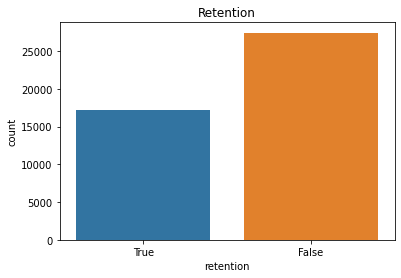

The retention for riders is 38.59%.


In [257]:
ax = sns.countplot(x="retention", data=df, order=[True, False])
ax.set_title('Retention')

plt.show()

print('The retention for riders is {:.2f}%.'.format(df['retention'].mean()*100))

Since we have our target column 'retention', let's get rid of datetime columns and keep only continuous and numeric series

In [258]:
df = df.drop(columns = ['last_trip_date', 'signup_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 11 columns):
city                      44666 non-null object
trips_in_first_30_days    44666 non-null int64
avg_rating_of_driver      44666 non-null float64
avg_surge                 44666 non-null float64
phone                     44666 non-null object
surge_pct                 44666 non-null float64
ultimate_black_user       44666 non-null bool
weekday_pct               44666 non-null float64
avg_dist                  44666 non-null float64
avg_rating_by_driver      44666 non-null float64
retention                 44666 non-null int64
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 3.5+ MB


To complete the preprocessing of our df, the ultimate_black_user was mapped to 0 and 1 to convert the type bool.

In [259]:
#preprocessing
df["ultimate_black_user"] = df["ultimate_black_user"].map({False:0, True:1})
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0


And now we split the data. The predictor X contains all the features while the target y corresponds to the retention column.

In [260]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

display(X_train.head())
display(y_train.head())

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
38514,Winterfell,0,4.500000,1.00,Android,0.0,1,0.0,1.56,5.0
14921,King's Landing,3,5.000000,1.00,iPhone,0.0,0,0.0,1.04,5.0
40861,Winterfell,0,4.601559,1.00,Android,0.0,0,66.7,8.76,4.7
22807,Winterfell,3,4.300000,1.00,iPhone,0.0,0,14.3,7.05,4.7
42664,Winterfell,3,4.900000,1.08,iPhone,11.1,1,88.9,3.32,4.9


38514    0
14921    0
40861    0
22807    1
42664    0
Name: retention, dtype: int64

We build a scikit-learn pipeline by first having two pipelines: the steps for continuous features, and the steps for discrete features.

The numeric_transformer simply scales the features so the magnitudes are relative. The categorical_transformer performs one-hot encoding on the categorical columns. After the preprocessing stages, the two pipelines diverge and get fed to the Random Forest classifier.

This entire pipeline is finally incorporated into Grid Search cross-validation.

In [263]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#pipeline for numeric features
numeric_features = ["avg_dist", "avg_rating_by_driver", "avg_rating_of_driver", \
                    "avg_surge", "surge_pct", "trips_in_first_30_days", "weekday_pct"]
numeric_transformer = [("scaler", StandardScaler())]
numeric_transformer = Pipeline(numeric_transformer)

#pipeline for categorical features
categorical_features = ["city", "phone", "ultimate_black_user"]
categorical_transformer = [("encoder", OneHotEncoder())]
categorical_transformer = Pipeline(categorical_transformer)

#divernce of the pipelines
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features), \
                  ("cat", categorical_transformer, categorical_features)])

#incorporating the random forest estimator
pipeline = Pipeline(steps=[("pre", preprocessor), \
                           ("rf", RandomForestClassifier(random_state = 42))])

#grid search parameters
params = {"rf__n_estimators" : [75, 100, 150],
          "rf__max_depth" : [5, 10, 15]}

#fitting the pipeline to the grid search
cv = GridSearchCV(pipeline, param_grid=params, cv=5)
cv.fit(X_train, y_train)

print(cv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pre',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                                 

In [264]:
print(f"Best parameters: {cv.best_params_}")
print(f"Training accuracy score from tuned model: \
       {cv.best_score_*100:.1f}%")

Best parameters: {'rf__max_depth': 10, 'rf__n_estimators': 150}
Training accuracy score from tuned model:        77.6%


The tuned model can be validated using our testing set. For the metrics, we make use of accuracy in terms of classification and F1 score to take account false positives and false negatives.

In [265]:
from sklearn import metrics

y_pred = cv.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_f1_score = metrics.f1_score(y_test, y_pred)

print(f"Model accuracy: {test_accuracy*100:.2f}%")
print(f"Model F1 Score: {test_f1_score:.2f}")

Model accuracy: 77.92%
Model F1 Score: 0.70


We have about 77% accuracy with our model, that means it will do fairly good job of determining the difference between a retained and not retained user.\
Let's extract important features by their associated weights 

In [266]:
pipeline.fit(X_train, y_train)

fea = pipeline.named_steps['rf'].feature_importances_

print(fea)

C:\Users\asha2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.30744745 0.10785295 0.07860961 0.04217026 0.09508859 0.08150815
 0.14331237 0.01258022 0.05336163 0.00822709 0.01549115 0.02418983
 0.01335834 0.01680236]


In [267]:
#replicating numeric_transformer of our pipeline
num_cols = df[numeric_features].columns
num_cols = num_cols.tolist()

#replicating categorical_transformer of our pipeline
cat_cols = pd.get_dummies(df[categorical_features]).columns
cat_cols = cat_cols.tolist()

#the column names are added together
cols = num_cols + cat_cols

#the column names are finally tied to our fe list
feature_importance = zip(cols, fea)
feature_importance = sorted(feature_importance, key=lambda x:x[1], reverse=True)

for i, j in feature_importance:
    print(f"Weight: {j:.3f} | Feature: {i}")

Weight: 0.307 | Feature: avg_dist
Weight: 0.143 | Feature: weekday_pct
Weight: 0.108 | Feature: avg_rating_by_driver
Weight: 0.095 | Feature: surge_pct
Weight: 0.082 | Feature: trips_in_first_30_days
Weight: 0.079 | Feature: avg_rating_of_driver
Weight: 0.053 | Feature: city_Astapor
Weight: 0.042 | Feature: avg_surge
Weight: 0.024 | Feature: phone_Android
Weight: 0.015 | Feature: city_Winterfell
Weight: 0.013 | Feature: phone_iPhone
Weight: 0.013 | Feature: ultimate_black_user
Weight: 0.008 | Feature: city_King's Landing


To improve longterm rider retention, Ultimate might want to focus on the top predictors of model performance like avg_dist, weekday_pct, avg_rating_by_driver and make some improvements.